# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset.
This lab will ask you to do a deeper data exploration

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_07_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [10]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [3]:
df['order_year'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df.dropna(subset=['order_year_month'], inplace=True)
df['order_year'] = df['order_year'].dt.year
df.dropna(subset=['order_year'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

In [4]:
categorical_cols = ['order_type', 'customer_name', 'city', 'state_province', 'email', 'product_name', 'product_line', 'product_status']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [5]:
seventy_fifth_percentile = df['product_price'].quantile(0.75)
twenty_fifth_percentile = df['product_price'].quantile(0.25)
iqr = seventy_fifth_percentile - twenty_fifth_percentile
lower_bound = twenty_fifth_percentile - 1.5 * iqr
upper_bound = seventy_fifth_percentile + 1.5 * iqr

In [29]:
df_clean = df[(df['quantity'] < 100) & (df['product_price'] < 3000)]
df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df_clean.describe()

<ipython-input-29-abdf43af6700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')


,order_id,order_year_month,quantity,product_price,total_amount,complete_customer_info,order_year,month
count,53552.000000,0,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000,53552.000000
mean,61941.495761,NaT,1.499701,560.242091,632.831140,1.008403,2023.405027,6.346430
min,45080.000000,NaT,1.000000,2.290000,2.290000,1.000000,1922.000000,1.000000
25%,55954.000000,NaT,1.000000,7.950000,14.970000,1.000000,2023.000000,3.000000
50%,62069.000000,NaT,1.000000,120.000000,120.000000,1.000000,2024.000000,6.000000
75%,68172.000000,NaT,2.000000,792.680000,1000.440000,1.000000,2024.000000,10.000000
max,74147.000000,NaT,5.000000,2498.000000,3249.950000,2.000000,2029.000000,12.000000
std,7262.611255,NaN,0.612287,717.160365,764.897608,0.091283,3.363937,3.535485


In [31]:
df_clean['order_year'] = df_clean['order_year_month'].loc[df_clean['order_year_month'].notnull()].dt.year
df_clean = df_clean[(df_clean['order_year'] > 2000) & (df_clean['order_year'] < 2028)]
df_clean.describe()

,order_id,order_year_month,quantity,product_price,total_amount,complete_customer_info,order_year,month
count,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna(axis=1)

In [8]:
missing_values = df.isnull().sum()
cols_with_missing = missing_values[missing_values > 0].index.tolist()
if 'product_price' in cols_with_missing:
    mean_price = df['product_price'].mean()
    df['product_price'].fillna(mean_price, inplace=True)
    print("'product_price' imputed with mean")
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


Missing values after imputation:
 order_id            0
order_date          0
order_year_month    0
customer_name       0
email               0
order_type          0
product_name        0
product_line        0
product_price       0
product_status      0
order_year          0
dtype: int64


In [11]:
df['total_amount']=(df['product_price'] * df['quantity'])
df.dropna(subset=['total_amount'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [12]:
df['complete_customer_info'] = (df['customer_name'].notna() & df['city'].notna() & df['state_province'].notna() & df['email'].notna())
df['complete_customer_info'] = df['complete_customer_info'].map({True: 1, False: 2})

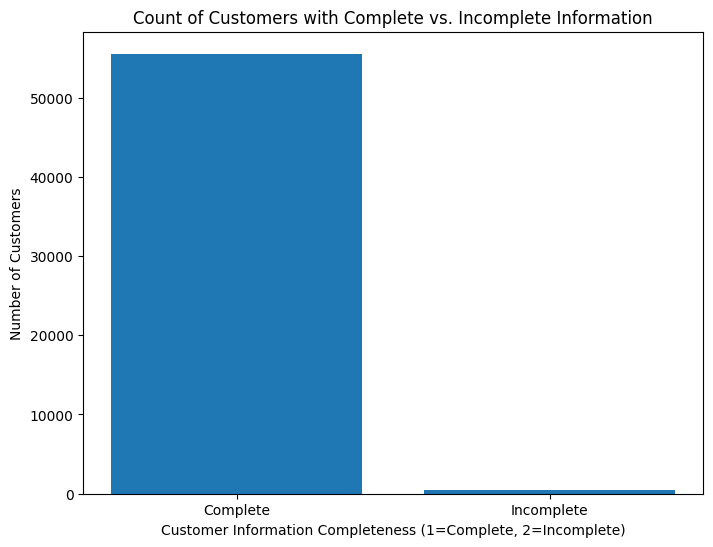

In [18]:
customer_info_counts = df['complete_customer_info'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(customer_info_counts.index, customer_info_counts.values)
plt.xlabel("Customer Information Completeness (1=Complete, 2=Incomplete)")
plt.ylabel("Number of Customers")
plt.title("Count of Customers with Complete vs. Incomplete Information")
plt.xticks([1, 2], ['Complete', 'Incomplete'])  # Set x-axis ticks and labels
plt.show()


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Spring, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [20]:
df['order_year_month'] = pd.to_datetime(df['order_year_month'].astype(str), format='%Y-%m', errors='coerce')
df.dropna(subset=['order_year_month'], inplace=True)
df['order_year'] = df['order_year_month'].dt.year
df.dropna(subset=['order_year'], inplace=True)
print(df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01       2023-07-01     Audrey Blanco   
1         51187  2023-07-01       2023-07-01       Isaac Allen   
2         51199  2023-07-02       2023-07-01        Ian Morgan   
3         51241  2023-07-04       2023-07-01        Alexa Bell   
4         51297  2023-07-08       2023-07-01        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29       2024-06-01        Ian Rogers   
56039     74062  2024-06-29       2024-06-01   Marcus Anderson   
56040     74065  2024-06-29       2024-06-01  Nathaniel Howard   
56041     74038  2024-06-29       2024-06-01        Robin Sanz   
56042     74110  2024-06-30       2024-06-01   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

In [21]:
df['month'] = df['order_year_month'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

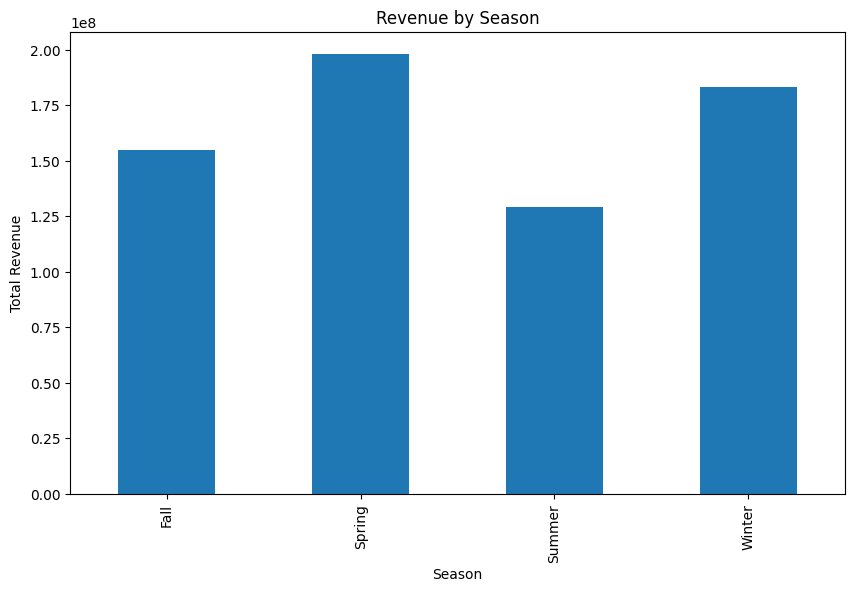

In [22]:
seasonal_revenue = df.groupby('season')['total_amount'].sum()
plt.figure(figsize=(10, 6))
seasonal_revenue.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.title('Revenue by Season')
plt.show()


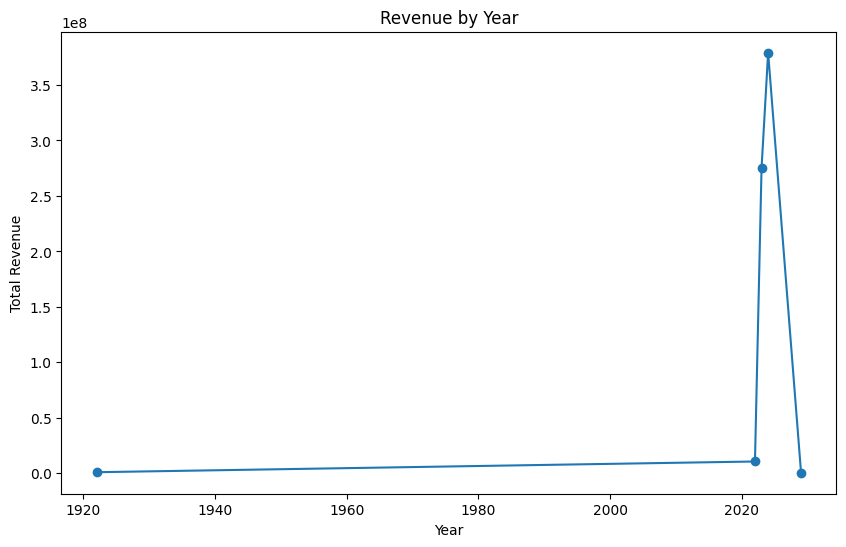

In [24]:
yearly_revenue = df.groupby('order_year')['total_amount'].sum()
plt.figure(figsize=(10, 6))
yearly_revenue.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Revenue by Year')
plt.show()

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [25]:
def categorize_product_line(product_line):
    outdoor_keywords = ["Camping", "Outdoors", "Hiking", "Cycling", "Mountaineering"]
    if any(keyword in str(product_line) for keyword in outdoor_keywords):
        return "Outdoor"
    else:
        return "Indoor"

df['product_category'] = df['product_line'].apply(categorize_product_line)
df


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount,complete_customer_info,order_year,month,season,product_category
0,51188,2023-07-01,2023-07-01,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97,1,2023,7,Summer,Indoor
1,51187,2023-07-01,2023-07-01,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96,1,2023,7,Summer,Indoor
2,51199,2023-07-02,2023-07-01,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95,1,2023,7,Summer,Indoor
3,51241,2023-07-04,2023-07-01,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,1,2023,7,Summer,Indoor
4,51297,2023-07-08,2023-07-01,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99,1,2023,7,Summer,Indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56038,74084,2024-06-29,2024-06-01,Ian Rogers,Port Mark,Alabama,ian_rogers@email.com,Retail,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,914.62,1,2024,6,Summer,Indoor
56039,74062,2024-06-29,2024-06-01,Marcus Anderson,West Aprilfurt,Nebraska,marcus_anderson@email.com,Retail,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,914.62,1,2024,6,Summer,Indoor
56040,74065,2024-06-29,2024-06-01,Nathaniel Howard,New Lindaview,Illinois,nathaniel_howard@email.com,Online,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,914.62,1,2024,6,Summer,Indoor
56041,74038,2024-06-29,2024-06-01,Robin Sanz,West Frankhaven,Arkansas,robin_sanz@email.com,Retail,1.0,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM,...",Electronics,914.62,Active,914.62,1,2024,6,Summer,Indoor


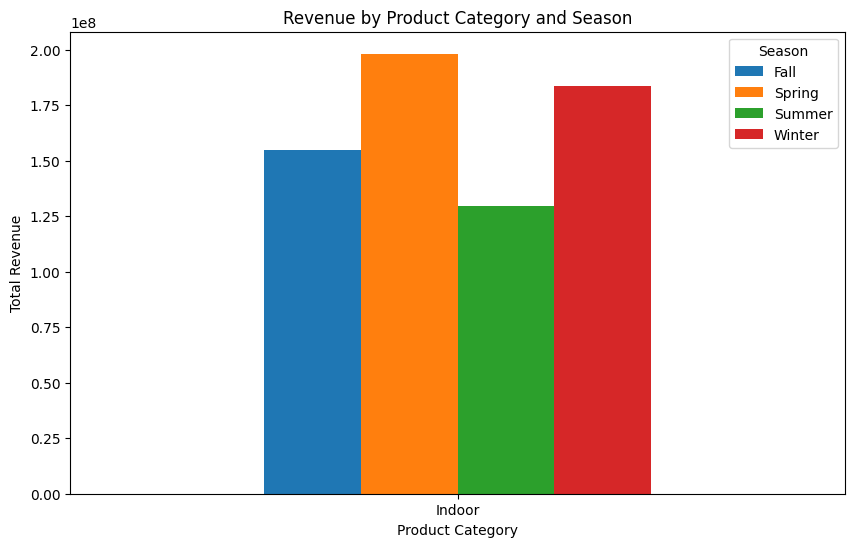

In [26]:
category_season_revenue = df.groupby(['product_category', 'season'])['total_amount'].sum().unstack()
category_season_revenue.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product Category and Season')
plt.xticks(rotation=0)
plt.legend(title='Season')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "lab_07_retailer_eda2.ipynb"
